<a href="https://colab.research.google.com/github/BoltonAthitDavies/water_inspection/blob/master/EfficientNetV2_water_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/EfficientNetV2_dumpcode" "/content/drive/MyDrive/CAI_Intern"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install dependencies

In [ ]:
!pip install --upgrade --quiet keras-cv
# !pip install --upgrade --quiet keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 39.2 MB/s eta 0:00:00


In [ ]:
import keras
print(keras.__version__)

2.15.0


## Deer Create Dataset

## Load Data

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import cv2
import shutil
from skimage import io
import numpy as np
import keras
import keras_cv
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

**make your data folder like this:**

```
 data/
   train/
     dogs/
       dog001.jpg
       dog002.jpg
       ...
     cats/
       cat001.jpg
       cat002.jpg
       ...
   validation/
     dogs/
       dog001.jpg
       dog002.jpg
       ...
     cats/
       cat001.jpg
       cat002.jpg
       ...
```



In [ ]:
data_path = "/content/drive/MyDrive/CAI_Intern/dump_dataset/"
os.mkdir(data_path + "train")
# os.mkdir(data_path + "validation")
os.mkdir(data_path + "test")

**create custom dataset**

In [ ]:
# stupid dataset
raw_path = "/content/drive/MyDrive/CAI_Intern/dumpRawData/"
classes = os.listdir(raw_path)

for cls in classes:
  os.mkdir(data_path + "train/" + cls)
  os.mkdir(data_path + "test/" + cls)
  cls_path = raw_path + cls + "/"
  cls_list = os.listdir(cls_path)
  cls_len = len(cls_list)

  destrain_path = data_path + "train/" + cls + "/"
  destest_path = data_path + "test/" + cls + "/"

  trainSplit = int(cls_len * (70 / 100))
  # validSplit = int(cls_len * (20 / 100))
  testSplit = int(cls_len * (30 / 100))
  print("trainsplit : ", trainSplit)
  print("testSplit : ", testSplit)

  # print(trainSplit / 100)
  for i in range(trainSplit):
    print(i)
    print(destrain_path + cls_list[i])
    shutil.copyfile(cls_path + cls_list[i], destrain_path + cls_list[i])

  # for j in range(trainSplit, trainSplit + validSplit):
  #   print(cls_list[j])
  #   shutil.copyfile(cls_path + cls_list[j] , data_path + "validation/" + cls_list[j])

  for k in range(trainSplit, trainSplit + testSplit):
    print(destest_path + cls_list[k])
    shutil.copyfile(cls_path + cls_list[k] , destest_path + cls_list[k])

trainsplit :  7
testSplit :  3
0
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog7.jpg
1
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog10.jpg
2
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog9.jpg
3
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog1.jpg
4
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog8.jpg
5
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog5.jpg
6
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog3.jpg
/content/drive/MyDrive/CAI_Intern/dump_dataset/test/dog/dog4.jpg
/content/drive/MyDrive/CAI_Intern/dump_dataset/test/dog/dog6.jpg
/content/drive/MyDrive/CAI_Intern/dump_dataset/test/dog/dog2.jpg
trainsplit :  7
testSplit :  3
0
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/cat/cat10.jpg
1
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/cat/cat8.jpg
2
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/cat/cat2.jpg
3
/content/drive/MyDrive/CAI_Intern/dump_dataset/train/cat/ca

## Create Data Generator

In [ ]:
train_path = "/content/drive/MyDrive/CAI_Intern/dump_dataset/train/"
# valid_path = "/content/drive/MyDrive/CAI_Intern/dump_dataset/validation/"
test_path = "/content/drive/MyDrive/CAI_Intern/dump_dataset/test/"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
os.listdir(train_path)

['dog', 'cat']

generating keras data generator format

In [ ]:
batch_size = 64
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 12 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


## Instantiate a Efficientnet

In [ ]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet",
    num_classes=2,
)
model.summary()

100%|██████████| 1.79k/1.79k [00:00<00:00, 2.16MB/s]
100%|██████████| 23.1M/23.1M [00:02<00:00, 8.74MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


Model: "image_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 efficient_net_v2b0_backbon  (None, None, None, 1280   5919312   
 e (EfficientNetV2Backbone)  )                                   
                                                                 
 avg_pool (GlobalAveragePoo  (None, 1280)              0         
 ling2D)                                                         
                                                                 
 predictions (Dense)         (None, 2)                 2562      
                                                                 
Total params: 5921874 (22.59 MB)
Trainable params: 5861266 (22.36 MB)
Non-trainable params: 60608 (236.75 KB)
_________________________________________________________________


## Fine-tune efficientNet

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
model.fit(train_generator, validation_data=valid_generator, epochs=20)

Epoch 1/20
1/1 [==============================] - 24s 24s/step - loss: 0.3227 - accuracy: 1.0000 - val_loss: 0.5218 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 327ms/step - loss: 0.3073 - accuracy: 1.0000 - val_loss: 0.4753 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 351ms/step - loss: 0.3101 - accuracy: 1.0000 - val_loss: 0.4774 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 333ms/step - loss: 0.2622 - accuracy: 1.0000 - val_loss: 0.3896 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 347ms/step - loss: 0.3183 - accuracy: 1.0000 - val_loss: 0.3913 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 337ms/step - loss: 0.3052 - accuracy: 0.9167 - val_loss: 0.4485 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 331ms/step - loss: 0.2860 - accuracy: 1.0000 - val_loss: 0.4160 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

In [ ]:
model.save("/content/drive/MyDrive/CAI_Intern/weights.keras")

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:4

In [ ]:
model.save_weights("/content/drive/MyDrive/CAI_Intern/dumpWeight.pt", overwrite=True, save_format=None, options=None)

Evaluate Model

In [ ]:
score = model.evaluate(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 96ms/step - loss: 0.3704 - accuracy: 1.0000
Test loss: 0.370434433221817
Test accuracy: 1.0


model prediction

In [ ]:
predict = model.predict_generator(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)

<ipython-input-95-60a5e93b77de>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator)


In [ ]:
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x.shape)
print(y.shape)

(12, 224, 224, 3)
(12, 2)


In [ ]:
y_classes

array([0, 0, 0, 1, 1, 1])

In [ ]:
hope = model.predict(x)

1/1 [==============================] - 1s 882ms/step


In [ ]:
hope.argmax(axis=-1)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

save and load weight

## Inferred efficientNet (0=cat, 1=dog)

In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/CAI_Intern/weights.keras')

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:4

In [ ]:
print(loaded_model)

using weight model

In [ ]:
dog_sample = io.imread("/content/drive/MyDrive/CAI_Intern/dump_dataset/train/dog/dog10.jpg")
dog_sample = cv2.resize(dog_sample, (224,224))
dog_sample = np.array([dog_sample])

predict = loaded_model.predict(dog_sample)

1/1 [==============================] - 0s 26ms/step


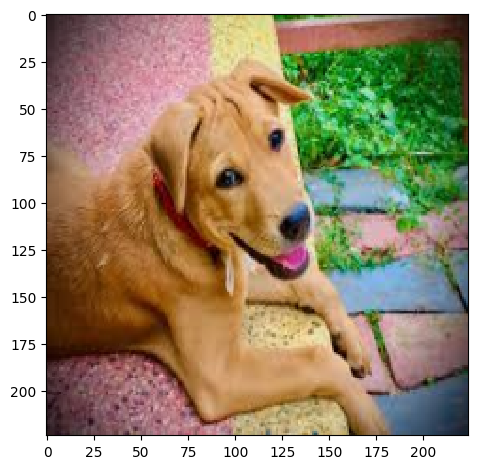

In [ ]:
io.imshow(dog_sample[0])
plt.show()

In [ ]:
ans = predict.argmax(axis=-1)

In [ ]:
ans

array([0])

In [ ]:
cat_sample = io.imread("/content/drive/MyDrive/CAI_Intern/dump_dataset/train/cat/cat8.jpg")
cat_sample = cv2.resize(cat_sample, (224,224))
cat_sample = np.array([cat_sample])

cat_predict = loaded_model.predict(cat_sample)

1/1 [==============================] - 0s 26ms/step


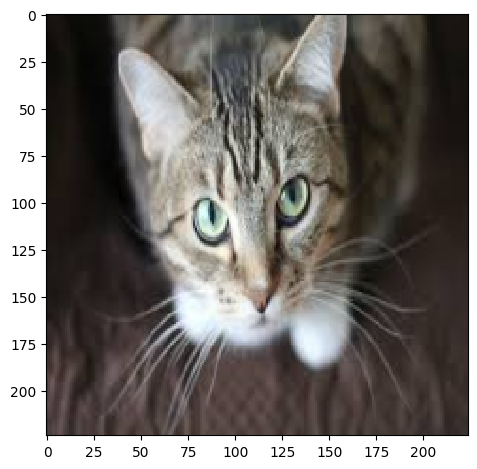

In [ ]:
io.imshow(cat_sample[0])
plt.show()

In [ ]:
cat_ans = cat_predict.argmax(axis=-1)

In [ ]:
cat_ans

array([0])

In [ ]:
predict = loaded_model.predict_generator(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)

<ipython-input-110-92ca1cd09aac>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = loaded_model.predict_generator(test_generator)


In [ ]:
y_classes

array([0, 0, 0, 1, 1, 1])

In [ ]:
test_generator[0].shape

(1, 224, 224, 3)

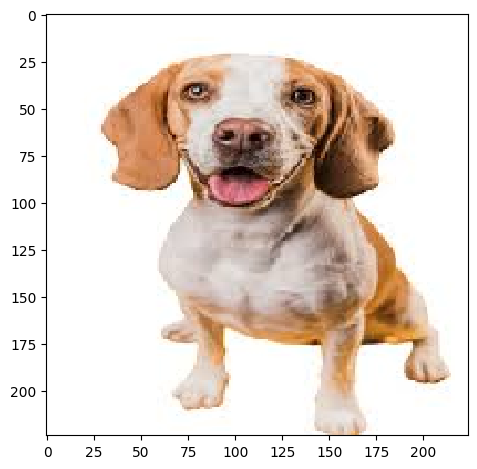

In [ ]:
io.imshow(test_generator[3][0])
plt.show()

# **Keep for nothing**

In [ ]:
dataset = tfds.load(
    "cats_vs_dogs", split="train", as_supervised=True, batch_size=128
)


# Resize images to a common size.
resize = keras_cv.layers.Resizing(224, 224, crop_to_aspect_ratio=True)
dataset = dataset.map(lambda x, y: (resize(x), y))

# Split off some valication data
validation_size = int(dataset.cardinality().numpy() * 0.1)
val_data = dataset.take(validation_size).shuffle(100)
train_data = dataset.skip(validation_size).shuffle(100)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.E7DE9H_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


## Run some inference

In [ ]:
test_image, label = next(valid_generator.as_numpy_iterator())
plt.imshow(test_image[0] / 255.)

AttributeError: 'DirectoryIterator' object has no attribute 'as_numpy_iterator'

In [ ]:
model.predict(test_image)

## Instantiate a CNN

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

## Fine-tune CNN


In [ ]:
train_generator.n

12

In [ ]:
train_generator.n//train_generator.batch_size

0

In [ ]:
model = prepare_model()
model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = int(train_generator.n/train_generator.batch_size),
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=20)

<ipython-input-74-48ab7b3824e2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


ValueError: Unexpected value for `steps_per_epoch`. Received value is 0. Please check the docstring for `model.fit()` for supported values.